In [4]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm

In [5]:
# variable declaration
TRAIN_DIR = r'D:\CatsandDogs\train'
TEST_DIR = r'D:\CatsandDogs\test'
IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogvscats--{}--{}.model'.format(LR, '9conv-sivanesh')

In [6]:
# Get file name
def img_label(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat':
        return [1,0]
    elif word_label == 'dog':
        return [0,1]
    else:
        return [0,0]

In [7]:
# train the data
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = img_label(img)
        path = os.path.join(TRAIN_DIR, img)
        img_read = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img_read, (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('training_data.npy', training_data)
    return training_data

In [8]:
# test the data
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_num = img.split('.')[0]
        img_read = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img_read, (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    np.save('testing_data.npy', testing_data)
    return testing_data
    

In [9]:
train_data = create_train_data()
# after the first run comment the above line as we have train data
# train_data = np.load('training_data.npy')
# comment the above after the file is generated

100%|███████████████████████████████████| 25000/25000 [00:28<00:00, 885.85it/s]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [10]:
# copied from https://pythonprogramming.net/tflearn-machine-learning-tutorial/
# profile sivanesh.developer69@gmail.com

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

from tensorflow.python.framework import ops
ops.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

# dog and cat
convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# check if the meta file exists
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('-------MODEL__LOADED------')


In [12]:
# separate to train and test data
proxy_train_data = train_data
train = proxy_train_data[:-500]
test = proxy_train_data[-500:]

In [13]:
# separate and reshape it X is image i[0] and Y is label i[1]
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]

X_TEST = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y_TEST = [i[1] for i in test]

In [14]:
# train the network
import tflearn.datasets.mnist as mnist

model = tflearn.DNN(convnet)
model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': X_TEST}, {'targets': Y_TEST}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)


Training Step: 1914  | time: 30.149s
| Adam | epoch: 005 | loss: 0.00000 - acc: 0.7762 -- iter: 24448/24500
Training Step: 1915  | time: 31.242s
| Adam | epoch: 005 | loss: 0.00000 - acc: 0.7767 | val_loss: 0.47479 - val_acc: 0.7700 -- iter: 24500/24500
--


In [15]:
model.save(MODEL_NAME)

INFO:tensorflow:D:\CatsandDogs\dogvscats--0.001--9conv-sivanesh.model is not in all_model_checkpoint_paths. Manually adding it.


100%|███████████████████████████████████| 25000/25000 [00:27<00:00, 898.50it/s]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


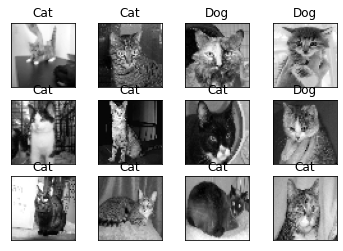

In [16]:
import matplotlib.pyplot as plt

test_data = process_test_data()
# after we get the file
# test_data = np.load('testing_data.npy')


fig = plt.figure()

for i, data in enumerate(test_data[:12]):
    # Dog is [1,0] and cat is [0, 1]
    img_num = data[1]
    img_label = data[0]
    
    y = fig.add_subplot(3, 4, i+1)
    img_actual = img_label
    data = img_label.reshape(IMG_SIZE, IMG_SIZE, 1)
    
    model_output = model.predict([data])[0]
    # check send element in array [1,0*] hence its dog else cat
    if np.argmax(model_output) == 1: stg_label = 'Dog'
    else : stg_label = 'Cat'
        
    y.imshow(img_actual, cmap='gray')
    plt.title(stg_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

In [17]:
# Kaggle submission
with open('submission-file.csv',  'w') as f:
    f.write('id,label\n')

In [18]:
with open('submission-file.csv',  'a') as f:
    for data in tqdm(test_data):
        # Dog is [0,1] and cat is [1, 0]
        img_num = data[1]
        img_label = data[0]
        img_actual = img_label
        data = img_label.reshape(IMG_SIZE, IMG_SIZE, 1)
    
        model_output = model.predict([data])[0]
        f.write('{}, {}\n'.format(img_num, model_output[1]))


100%|███████████████████████████████████| 25000/25000 [00:45<00:00, 548.60it/s]
